<a href="https://colab.research.google.com/github/Sandrala0413/CNN-Assignment-2025/blob/main/CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CNN Classroom Exercise: Image Classification with CIFAR-10
# Objective: Practice building, training, and evaluating a CNN using TensorFlow/Keras
# Environment: Google Colab with GPU
# Dataset: CIFAR-10 (10 classes of 32x32 color images)

# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Step 2: Load and Preprocess CIFAR-10 Dataset
# CIFAR-10 contains 60,000 32x32 color images in 10 classes (e.g., airplane, cat, dog)
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names for visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


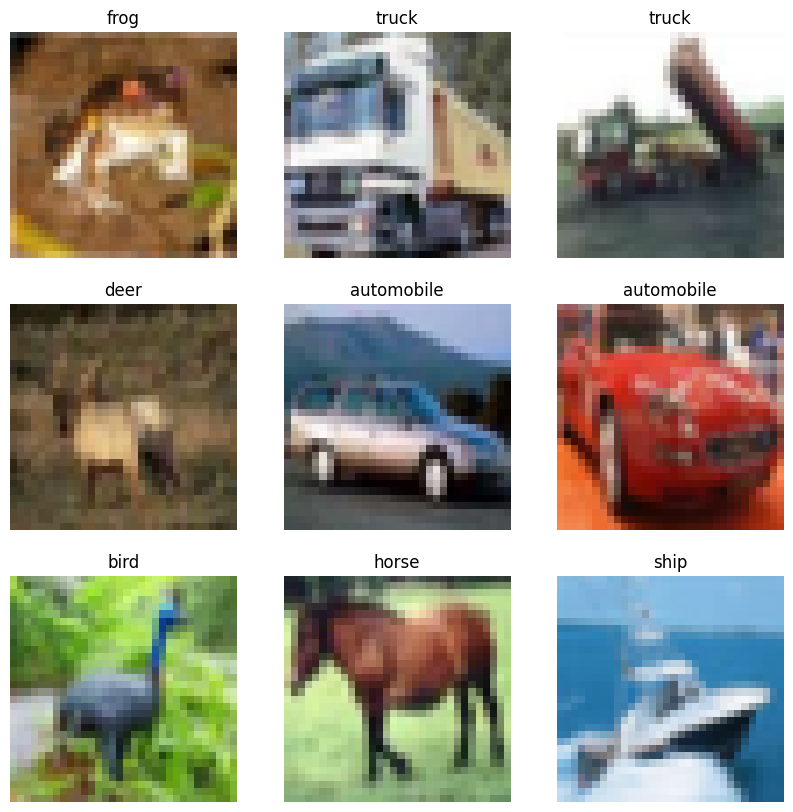

In [3]:
# Step 3: Visualize Sample Data
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [4]:
# Step 4: Build the CNN Model
model = models.Sequential([
    # # Convolutional Layer 1: 32 filters, 3x3 kernel, ReLU activation
    # layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    # layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.2),
    # # Convolutional Layer 2: 64 filters, 3x3 kernel
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Dropout(0.2),

    # # Convolutional Layer 3: 64 filters, 3x3 kernel
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # # Convolutional Layer 4: 64 filters, 3x3 kernel
    # layers.Conv2D(64, (3, 3), activation='relu'),

    # # Flatten the output for dense layers
    # layers.Flatten(),
    # # Dense Layer: 64 units
    # layers.Dense(64, activation='relu'),
    # layers.Dropout(0.2),
    # # Output Layer: 10 units (one per class) with softmax
    # layers.Dense(10, activation='softmax')

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
# Display model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,362,698 (9.01 MB)

 Trainable params: 2,361,418 (9.01 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [5]:
# Step 5: Compile the Model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [7]:
# Step 6: Train the Model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1002s 638ms/step - accuracy: 0.3977 - loss: 1.9281 - val_accuracy: 0.6357 - val_loss: 1.0409
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1028s 629ms/step - accuracy: 0.6438 - loss: 1.0192 - val_accuracy: 0.6954 - val_loss: 0.8626
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1042s 629ms/step - accuracy: 0.7082 - loss: 0.8398 - val_accuracy: 0.7249 - val_loss: 0.7944
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1060s 640ms/step - accuracy: 0.7412 - loss: 0.7454 - val_accuracy: 0.7596 - val_loss: 0.6920
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1028s 631ms/step - accuracy: 0.7668 - loss: 0.6704 - val_accuracy: 0.7770 - val_loss: 0.6663
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1004s 607ms/step - accuracy: 0.7941 - loss: 0.5946 - val_accuracy: 0.8018 - val_loss: 0.5631
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1018s 630ms/step - accuracy: 0.8121 - loss: 0.5371 - val_accuracy: 0.7855 - val_loss: 0.6165
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 996s 601ms/st

In [8]:
# Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")


313/313 - 43s - 136ms/step - accuracy: 0.8183 - loss: 0.5583

Test accuracy: 0.8183


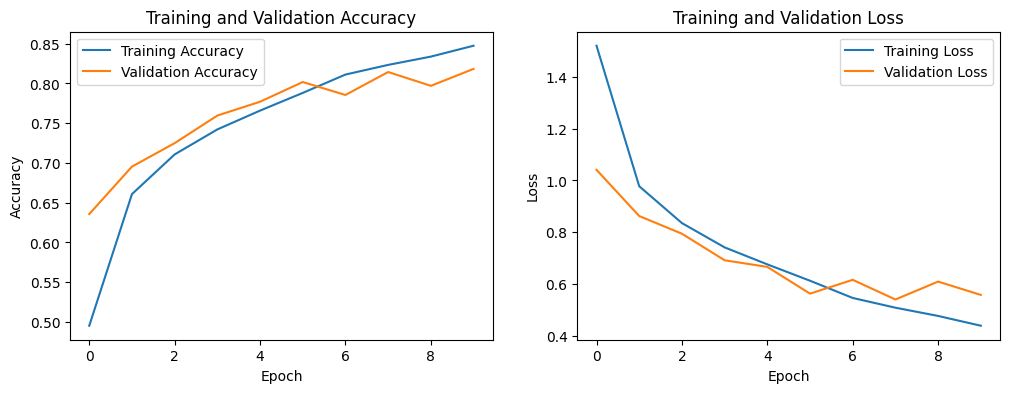

In [9]:

# Step 8: Plot Training and Validation Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [10]:
# Step 9: Make Predictions
predictions = model.predict(test_images[:5])
for i in range(5):
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    print(f"Image {i+1}: Predicted: {predicted_label}, True: {true_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
Image 1: Predicted: cat, True: cat
Image 2: Predicted: ship, True: ship
Image 3: Predicted: ship, True: ship
Image 4: Predicted: airplane, True: airplane
Image 5: Predicted: frog, True: frog


In [11]:
# Step 10: Save Model Performance for Autograding
# This cell saves the model performance to a text file for GitHub Actions
try:
    # Get final training accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # Create performance summary
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""

    # Save to file for GitHub Actions
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)

    print("Model performance saved to model_accuracy.txt")
    print(performance_text)

except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8183
Test Loss: 0.5583
Final Training Accuracy: 0.8475
Final Validation Accuracy: 0.8183
Final Training Loss: 0.4394
Final Validation Loss: 0.5583
Training Epochs: 10
Model Parameters: 2362698


In [ ]:
# ## Task 5:
# ### 調整部分
# 1. 修改CNN模型架構時，首先在第一和第二層捲積層增加了Dropout(0.1)防止overfitting，但accuracy只比原先高很微小的一點點，後來又嘗試增加捲積層層數，以及調整Dropout的比例，使得結果如下：
# ```
# Model Performance Summary:
# Test Accuracy: 0.8270
# Test Loss: 0.5195
# Final Training Accuracy: 0.8537
# Final Validation Accuracy: 0.8270
# Final Training Loss: 0.4214
# Final Validation Loss: 0.5195
# Training Epochs: 10
# Model Parameters: 2362698
# ```
# 2. 使用Adam優化器，並設定學習率為0.0005
# 3. 加入`ImageDataGenerator`，分別設定
# ```
# rotation_range=15,    //每張圖片在訓練時會被隨機旋轉 ±15 度的角度
# width_shift_range=0.1,  //將圖片在水平方向（X軸）平移，最大平移距離是圖片寬度的10%
# height_shift_range=0.1, //將圖片在垂直方向（Y軸）平移，最大平移距離是圖片高度的10%
# horizontal_flip=True  //隨機將圖片水平翻轉
# ```
# 如此能幫助模型學習更具泛化能力，提升模型識別多樣性
# 加上後結果如下：
# ```
# Model Performance Summary:
# Test Accuracy: 0.8183
# Test Loss: 0.5583
# Final Training Accuracy: 0.8475
# Final Validation Accuracy: 0.8183
# Final Training Loss: 0.4394
# Final Validation Loss: 0.5583
# Training Epochs: 10
# Model Parameters: 2362698
# ```

# ### 結果分析
# 在還未加入`ImageDataGenerator`前，模型的準確率已突破80%，約為83%，從圖表可看出模型尚未overfitting。結果還可以更好，因此使用了`ImageDataGenerator`，希望可以讓模型更接近最佳化，但反而導致模型準確率跟Loss分別有些微的降低跟升高，從圖表可看出在Epoch 5後有overfitting的現象

# 因此最後模型的最佳結果為
# ```
# Model Performance Summary:
# Test Accuracy: 0.8270
# Test Loss: 0.5195
# Final Training Accuracy: 0.8537
# Final Validation Accuracy: 0.8270
# Final Training Loss: 0.4214
# Final Validation Loss: 0.5195
# Training Epochs: 10
# Model Parameters: 2362698
# ```
